<h4>При необходимости установим библиотеку</h4>

In [2]:
!pip install kaggle_environments

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of shimmy to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.8/953.8 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.2/840.2 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.5 MB/s eta 0:00:00
  Created wheel for chess: filename=chess-1.11.1-py3-none-any.whl size=148497 sha256=dd3156257a4339f29b16f5bbb9a36b25e98d7485b42985fdc88b1f0e9bb86173
  Stored in directory: /root/.cache/pip/wheels/2e/2d/23/1bfc95db984ed3ecbf6764167dc7526d0ab521cf9a9852544e
Successfully built chess


<h4>Подключим к проекту нужные библиотеки</h4>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from kaggle_environments import make, evaluate

<h4>Создадим файл с вспомогательными функциями</h4>

In [4]:
%%writefile customers_functions.py

from collections import Counter

def get_win(opponent_actions):
    #Добавляем 1, так как следующее число бьет предыдущее
    #Остаток от деления на 3, для того что бы не выйти ща рамки 0, 1, 2, где
    # 0 - камень
    # 1 - бумага
    # 2 - ножницы
    return (opponent_actions + 1) % 3

#Функция для получения самого частого хода после текущего
def get_possible_next_actions(opponent_series, last_actions):
    #Объявим счетчик
    counter_steps = Counter()
    #В цикле пройдемся по всем ходам оппонента
    for index, value in enumerate(opponent_series):
        #Если проверяемый ход такой же как предыдущий ход
        #и это не последний элемент списка
        if value == last_actions and index != len(opponent_series) - 1:
            #То запишем следующий по индексу ход
            counter_steps[opponent_series[index+1]] =+1
    #Определим самый частый следующий ход оппонента
    often_next_actions = counter_steps.most_common(1)
    if len(often_next_actions) != 0:
        #Если нашли значение
        return often_next_actions[0][0]
    else:
        #Если ничего не нашли
        return None

Writing customers_functions.py


<H3>1) Опишем агента играющий камнем</H3>
Данный агент всегда играет только камнем.

In [5]:
%%writefile only_rock_agent.py
def only_rock_agent(observation, configuration):
    #значение 0 - камень
    return 0

Writing only_rock_agent.py


<H3>2) Опишем агента играбщий бумагой</H3>
Данный агент всегда играет только бумагой.

In [6]:
%%writefile only_paper_agent.py
def only_paper_agent(observation, configuration):
    #значение 1- бумага
    return 1

Writing only_paper_agent.py


<H3>3) Опишем агента играбщий ножницами</H3>
Данный агент всегда играет только ножницами.

In [7]:
%%writefile only_scissors_agent.py
def only_scissors_agent(observation, configuration):
    #значение 2 - ножницы
    return 2

Writing only_scissors_agent.py


<H3>4) Опишем агента играющий случайным образом</H3>
Данный агент делает выбор на основе псевдо-случайного числа.

In [8]:
%%writefile random_agent.py
import random
def random_agent(observation, configuration):
    return random.randint(0, 2)

Writing random_agent.py


<H3>5) Опишем агента играющий против случайного значения</H3>
Данный агент делает выбор побеждающий выпавшее случайное число.

In [9]:
%%writefile win_random_agent.py
import random
from customers_functions import get_win

def win_random_agent(observation, configuration):
    random_value = random.randint(0, 2)
    #наш ход бьет случайное значение
    return get_win(random_value)

Writing win_random_agent.py


<H3>6) Опишем агента играющий по очереди</H3>
Данный агент делает выбор по кругу следующим образом камень->бумага->нождницы.

In [10]:
%%writefile loop_agent.py
def loop_agent(observation, configuration):
    step = observation.step
    result = int(step % 3)
    return result

Writing loop_agent.py


<H3>7) Опишем агента играющий как оппонент</H3>
Данный агент играет так как оппонент на прошлом ходе.</br>
Если ход первый выбирается случайный вариант.

In [11]:
%%writefile copy_agent.py
import random
def copy_agent(observation, configuration):
    step = observation.step
    if step > 0:
        lastOpponentAction = observation.lastOpponentAction
        return lastOpponentAction
    else:
        return random.randint(0, 2)

Writing copy_agent.py


<H3>8) Опишем агента играющий против оппонента</H3>
Данный агент делает выбор, побеждающий предыдущий ход оппонента.</br>
Если ход первый выбирается случайный вариант.

In [12]:
%%writefile win_last_agent.py
import random
from customers_functions import get_win

def win_last_agent(observation, configuration):
    if observation.step > 0:
        lastOpponentAction = observation.lastOpponentAction
        #Наш ход бьет предыдущий ход оппонента
        return get_win(lastOpponentAction)
    else:
        return random.randint(0, 2)

Writing win_last_agent.py


<H3>9) Опишем агента играющий как самый частый выбор оппонента</H3>
Данный агент делает такой же выбор как самый частый ход оппонента.</br>
Если ход первый выбирается случайный вариант.

In [13]:
%%writefile copy_often_agent.py
import random
from collections import Counter

agent_9_opponent_series = Counter()

def copy_often_agent(observation, configuration):
    #Счетчик как ходит противник
    global agent_9_opponent_series

    if observation.step > 0:
        lastOpponentAction = observation.lastOpponentAction
        #Запишем ход противника
        agent_9_opponent_series[lastOpponentAction] =+ 1
        #Получим часто используемый ход противника
        often_actions = agent_9_opponent_series.most_common(1)[0][0]
        return often_actions
    else:
        return random.randint(0, 2)

Writing copy_often_agent.py


<H3>10) Опишем агента играющий против самого частого выбора оппонента</H3>
Данный агент делает выбор, побеждающий самый частый ход оппонента.</br>
Если ход первый выбирается случайный вариант.

In [14]:
%%writefile win_often_agent.py
import random
from collections import Counter
from customers_functions import get_win

agent_10_opponent_series = Counter()

def win_often_agent(observation, configuration):
    #Счетчик как ходит противник
    global agent_10_opponent_series

    if observation.step > 0:
        lastOpponentAction = observation.lastOpponentAction
        #Запишем ход противника
        agent_10_opponent_series[lastOpponentAction] =+ 1
        #Получим часто используемый ход противника
        often_actions = agent_10_opponent_series.most_common(1)[0][0]
        #Наш ход бьет часто используемый ход противника
        return get_win(often_actions)
    else:
        return random.randint(0, 2)

Writing win_often_agent.py


<H3>11) Опишем агента играющий как частый следеющих выбор оппонента</H3>
Данный агент ходит так же как и самый частый следующий ход оппонета.</br>
Если не удалось определить следующий ход противника, выбирается случайный вариант.

In [15]:
%%writefile copy_often_next_agent.py
import random
from customers_functions import *

agent_11_opponent_series = list()

def copy_often_next_agent(observation, configuration):
    #Список ходов противника
    global agent_11_opponent_series

    if observation.step > 0:
        lastOpponentAction = observation.lastOpponentAction
        #Запишем ход противника
        agent_11_opponent_series.append(lastOpponentAction)
        #Получим часто используемый следующий ход противника
        often_next_action = get_possible_next_actions(agent_11_opponent_series, lastOpponentAction)
        if often_next_action != None:
            #Если было получено значение
            return often_next_action
        else:
            #Если значение не было получено, возвращаем случайное число
            return random.randint(0, 2)
    else:
        return random.randint(0, 2)



Writing copy_often_next_agent.py


<H3>12) Опишем агента играющий против частого следеющего выбора оппонента</H3>
Данный агент делает выбор, побеждающий самый частый следующий ход оппонента.</br>
Если не удалось определить следующий ход противника, выбирается случайный вариант.

In [16]:
%%writefile win_often_next_agent.py
import random
from customers_functions import *

agent_12_opponent_series = list()

def win_often_next_agent(observation, configuration):
    #Список ходов противника
    global agent_12_opponent_series

    if observation.step > 0:
        lastOpponentAction = observation.lastOpponentAction
        #Запишем ход противника
        agent_12_opponent_series.append(lastOpponentAction)
        #Получим часто используемый следующий ход противника
        often_next_action = get_possible_next_actions(agent_12_opponent_series, lastOpponentAction)
        if often_next_action != None:
            #Если было получено значение
            return get_win(often_next_action)
        else:
            #Если значение не было получено, возвращаем случайное число
            return random.randint(0, 2)
    else:
        return random.randint(0, 2)

Writing win_often_next_agent.py


<h1>Турнир</h1>

In [17]:
#Создадим список с нашими агентами
agent_list = ['only_rock_agent', 'only_paper_agent',      'only_scissors_agent',
              'random_agent',    'win_random_agent',      'loop_agent',
              'copy_agent',      'win_last_agent',        'copy_often_agent',
              'win_often_agent', 'copy_often_next_agent', 'win_often_next_agent']

agent_file_list = ['only_rock_agent.py', 'only_paper_agent.py',      'only_scissors_agent.py',
                   'random_agent.py',    'win_random_agent.py',      'loop_agent.py',
                   'copy_agent.py',      'win_last_agent.py',        'copy_often_agent.py',
                   'win_often_agent.py', 'copy_often_next_agent.py', 'win_often_next_agent.py']

scores = np.zeros((len(agent_list), len(agent_list)), dtype=int)

<h4>Выполним сравнение агентов каждый с каждым</h4>

In [21]:
for index_agent_1 in range(len(agent_list)):
    for index_agent_2 in range(index_agent_1 + 1, len(agent_list)):

        current_score = evaluate(
            "rps",  #environment to use - no need to change
            [agent_file_list[index_agent_1], agent_file_list[index_agent_2]], #agents to evaluate
            configuration={"episodeSteps": 1000} #number of episodes
        )

        scores[index_agent_1, index_agent_2] = current_score[0][0]
        scores[index_agent_2, index_agent_1] = current_score[0][1]

df_scores = pd.DataFrame(
    scores,
    index=agent_list,
    columns=agent_list,
)

In [22]:
df_scores

,only_rock_agent,only_paper_agent,only_scissors_agent,random_agent,win_random_agent,loop_agent,copy_agent,win_last_agent,copy_often_agent,win_often_agent,copy_often_next_agent,win_often_next_agent
only_rock_agent,0,-999,999,103,0,0,0,-997,0,-997,0,-999
only_paper_agent,999,0,-999,0,0,0,0,-998,0,-997,0,-997
only_scissors_agent,-999,999,0,0,0,0,0,-998,0,-997,0,-996
random_agent,-103,0,0,0,32,-43,0,35,0,0,0,33
win_random_agent,0,0,0,-32,0,-41,55,0,-64,-27,0,0
loop_agent,0,0,0,43,41,0,997,0,0,0,0,-995
copy_agent,0,0,0,0,-55,-997,0,999,0,0,0,0
win_last_agent,997,998,998,-35,0,0,-999,0,998,997,501,992
copy_often_agent,0,0,0,0,64,0,0,-998,0,0,0,-998
win_often_agent,997,997,997,0,27,0,0,-997,0,0,0,-994


<h4>Отрисуем результат</h4>

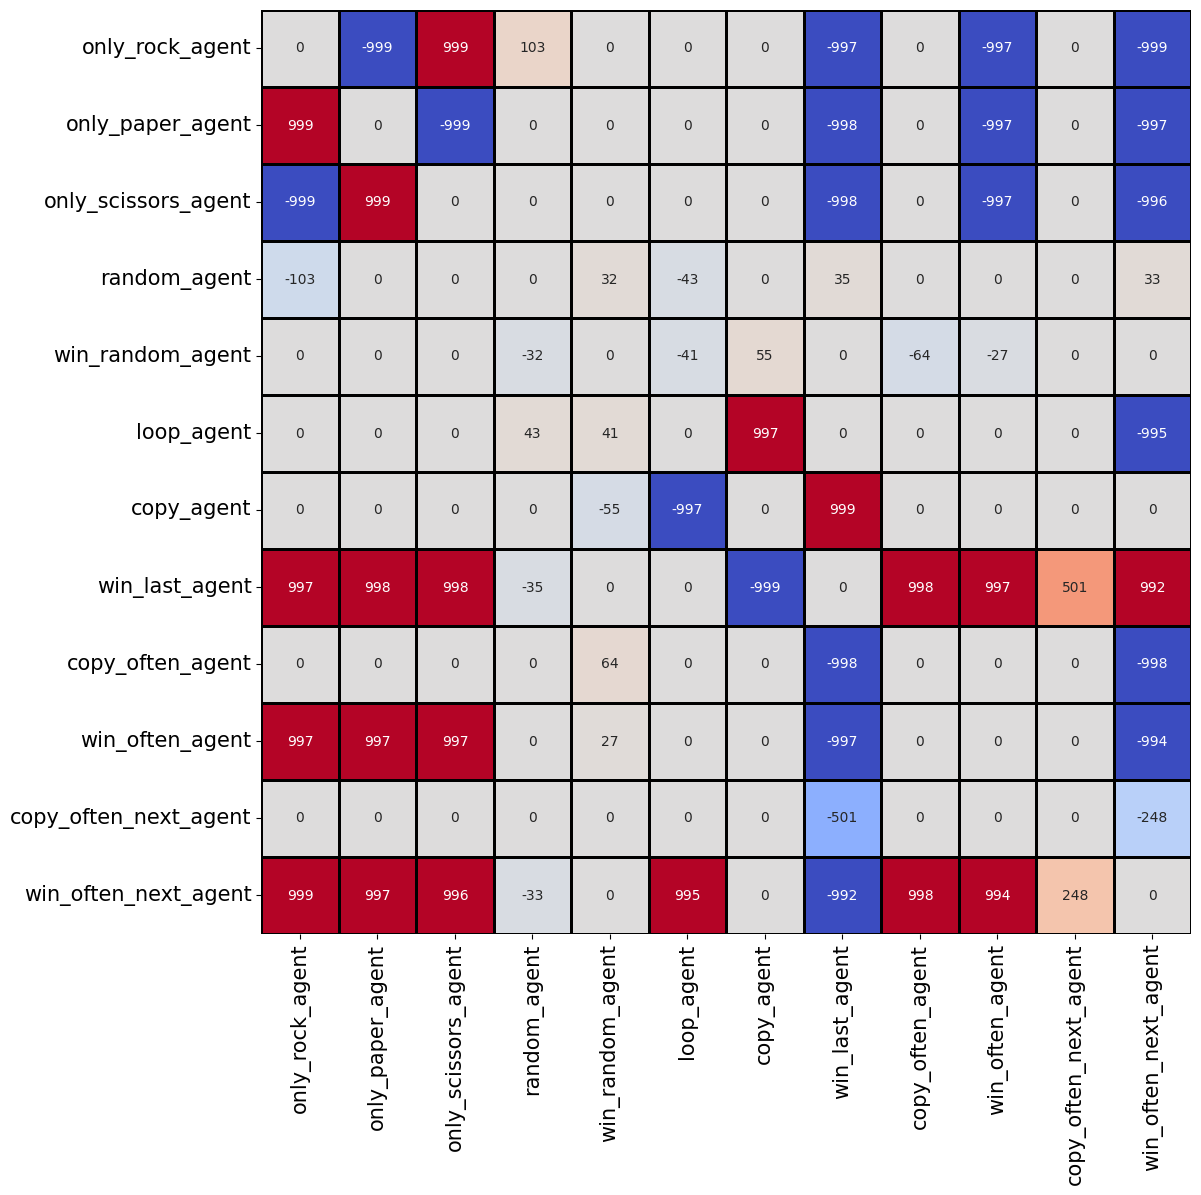

In [23]:
#Често, взял из интернете как отресовать результат, так как данные бибилотеки еще не проходили
plt.figure(figsize=(len(agent_list), len(agent_list)))
sns.heatmap(
    df_scores, annot=True, cbar=False, cmap='coolwarm', linewidths=1, linecolor='black', fmt="d"
)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15);